<a href="https://colab.research.google.com/github/pererodin/RPS-Theory/blob/main/RPS_synthetic_analysis_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform


In [6]:
roles = {
    "Сын": [0.4, 0.8, 0.6, -0.2, 0.3],
    "Родитель": [0.8, 0.4, 0.7, 0.1, 0.9],
    "Партнёр": [0.6, 0.7, 0.8, 0.0, 0.6],
    "Специалист": [0.9, 0.3, 0.9, 0.2, 0.8],
    "Ученик": [0.7, 0.6, 0.9, 0.1, 0.7],
    "Брат": [0.5, 0.5, 0.7, -0.1, 0.5],
    "Друг": [0.6, 0.7, 0.8, 0.0, 0.6],
}

np.random.seed(42)
data=[]
for role,params in roles.items():
    samples=np.random.normal(loc=params,scale=0.05,size=(1000,len(params)))
    df_r=pd.DataFrame(samples,columns=["logic","emotion","attention","risk","reflection"])
    df_r["role"]=role
    data.append(df_r)
df=pd.concat(data,ignore_index=True)
df.head()


,logic,emotion,attention,risk,reflection,role
0,0.424836,0.793087,0.632384,-0.123849,0.288292,Сын
1,0.388293,0.878961,0.638372,-0.223474,0.327128,Сын
2,0.376829,0.776714,0.612098,-0.295664,0.213754,Сын
3,0.371886,0.749358,0.615712,-0.245401,0.229385,Сын
4,0.473282,0.788711,0.603376,-0.271237,0.272781,Сын


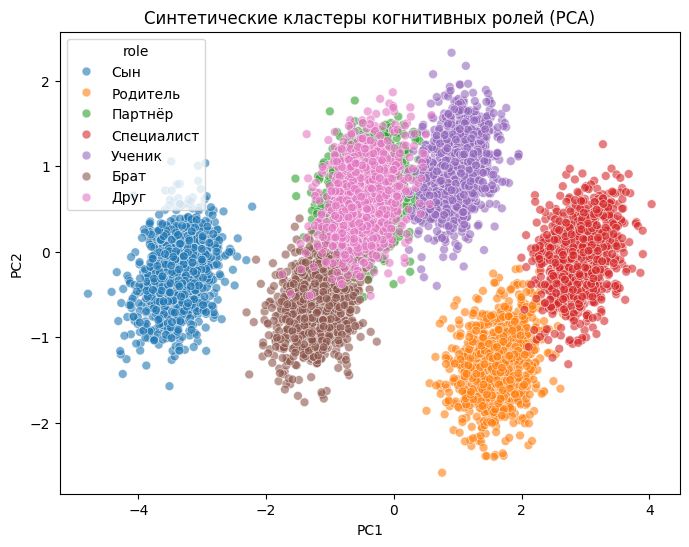

In [7]:
X = StandardScaler().fit_transform(df.drop(columns="role"))
pca = PCA(n_components=2)
df["PC1"], df["PC2"] = pca.fit_transform(X).T

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="role", s=40, alpha=0.6)
plt.title("Синтетические кластеры когнитивных ролей (PCA)")
plt.show()


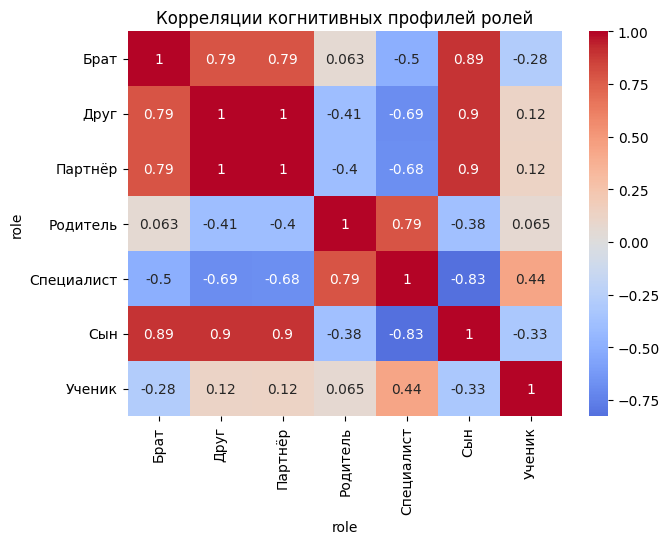

In [8]:
corr = df.groupby("role").mean(numeric_only=True).T.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Корреляции когнитивных профилей ролей")
plt.show()



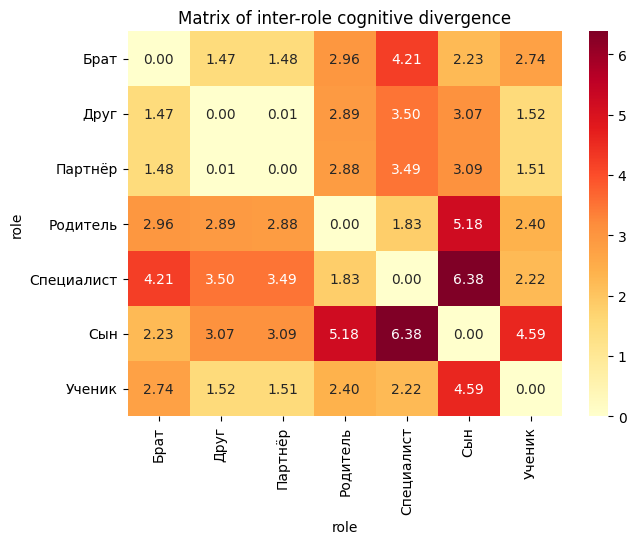

In [9]:
mean_profiles=df.groupby("role").mean(numeric_only=True)
dist=squareform(pdist(mean_profiles,metric="euclidean"))
dist_df=pd.DataFrame(dist,index=mean_profiles.index,columns=mean_profiles.index)

plt.figure(figsize=(7,5))
sns.heatmap(dist_df,annot=True,cmap="YlOrRd",fmt=".2f")
plt.title("Matrix of inter-role cognitive divergence")
plt.show()


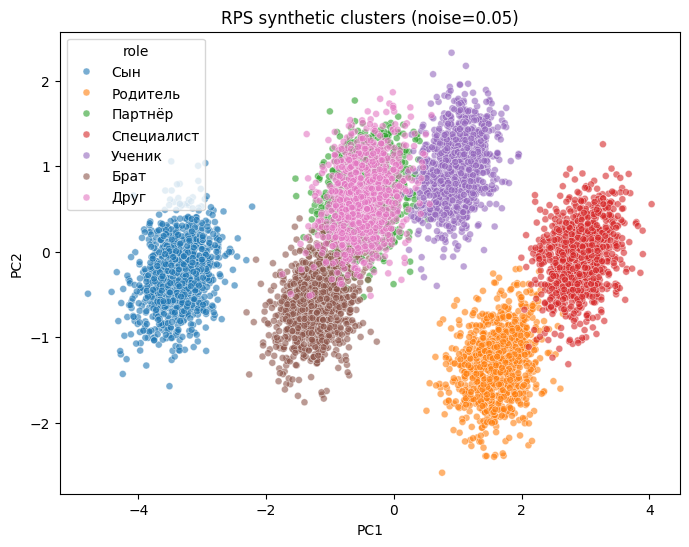

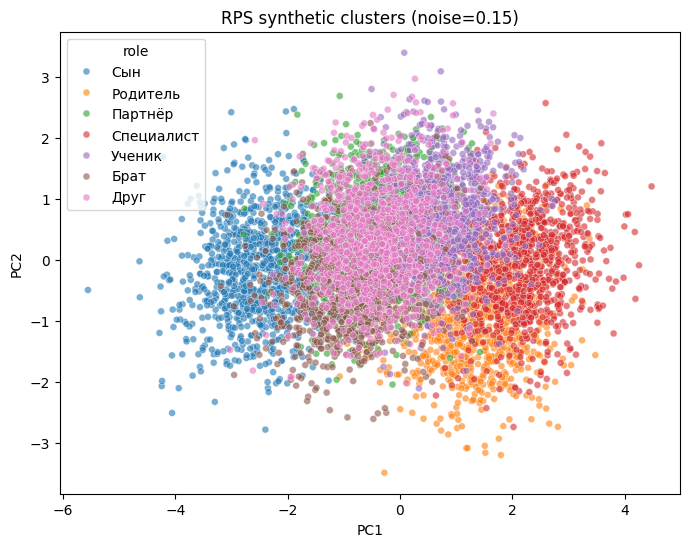

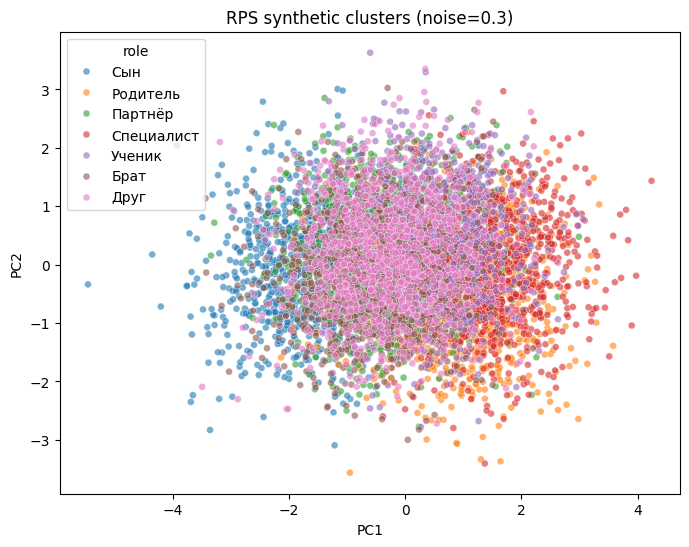

In [10]:
for noise in [0.05,0.15,0.30]:
    np.random.seed(42)
    data=[]
    for role,params in roles.items():
        samples=np.random.normal(loc=params,scale=noise,size=(1000,len(params)))
        df_r=pd.DataFrame(samples,columns=["logic","emotion","attention","risk","reflection"])
        df_r["role"]=role
        data.append(df_r)
    df=pd.concat(data,ignore_index=True)

    X=StandardScaler().fit_transform(df.drop(columns="role"))
    pca=PCA(n_components=2)
    df["PC1"],df["PC2"]=pca.fit_transform(X).T

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df,x="PC1",y="PC2",hue="role",s=25,alpha=0.6)
    plt.title(f"RPS synthetic clusters (noise={noise})")
    plt.show()
